## KennRivQ.ipynb, Kennicott River Discharge loader / plotter / integrator
### Mike Loso, Updated 12/4/2021

This code imports a 15-minute record of river discharge from Kennicott River (Kenn River stage 2021_11_12.xlsx), resamples at hourly time step, plots it, then extracts a particular time period and plots that. 

Finally it integrates the discharge record to calculate total discharge over the period of record, including plotting of annual (summer) discharge for each year in a box plot.


In [1]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os, csv
from scipy import stats
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
## LOAD DATA

# set working directory
data_dir = r'~/MLo/KennGlac/data'
# Load an excel workbook that is in the local directory
xlsx=pd.ExcelFile(os.path.join(data_dir,'Kenn River stage 2021_11_12.xlsx'))

# Load the second worksheet as 'wb', treat -9999 as nan, make first column (Timestamp...) the index, ignore some columns, and start at the "modern" record
wb=pd.read_excel(xlsx,sheet_name='master',na_values=[-9999],index_col=0,skiprows=range(1,10608),usecols=range(0,2),dtype={'b': np.float64})

In [3]:
# ## VIEW RAW DATA

# # Print summary of worksheet
# print(wb)

# # Print datatypes (dtypes) of DataFrame (wb)
# print(wb.dtypes)

# # Plot raw data, set fig size
# plt.rcParams["figure.figsize"] = (10,6)
# wb.plot();

                          Q     Qm3s       Qm3H
Datetime                                       
2016-05-27 00:00:00  2732.5  77.3844  278583.84
2016-05-27 01:00:00  2795.0  79.1544  284955.84
2016-05-27 02:00:00  2785.0  78.8712  283936.32
2016-05-27 03:00:00  2780.0  78.7296  283426.56
2016-05-27 04:00:00  2742.5  77.6676  279603.36
...                     ...      ...        ...
2021-11-12 10:00:00     NaN      NaN        NaN
2021-11-12 11:00:00     NaN      NaN        NaN
2021-11-12 12:00:00     NaN      NaN        NaN
2021-11-12 13:00:00     NaN      NaN        NaN
2021-11-12 14:00:00     NaN      NaN        NaN

[47895 rows x 3 columns]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
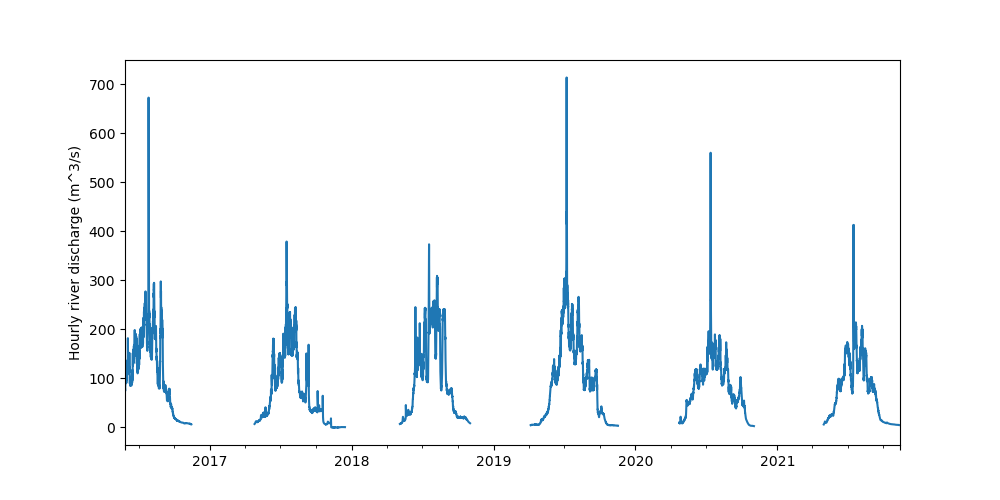

In [4]:
## RESAMPLE AT HOURLY TIMESTEP AND CALCULATE HOURLY Q

# create new pandas dataframe "HOURLY" for resampling
hourly=pd.DataFrame()

# resample at hourly
hourly['Q'] = wb['Q (cfs)'].resample('H').mean() # resample by day and grab max, min, and avg

# convert to hourly average cubic meters per second (Qm3s)
hourly['Qm3s'] = hourly.Q*.02832

# get column of hourly total Q (Qm3H)
hourly['Qm3H'] = hourly.Qm3s*3600

## VIEW RESAMPLED DATA

# Print summary of hourly worksheet
print(hourly)

# Plot hourly Q (m3/s) for entire record
fig,ax=plt.subplots(figsize=(10,5))
hourly.Qm3s.plot();
ax.set_xlabel('')
ax.set_ylabel('Hourly river discharge (m^3/s)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
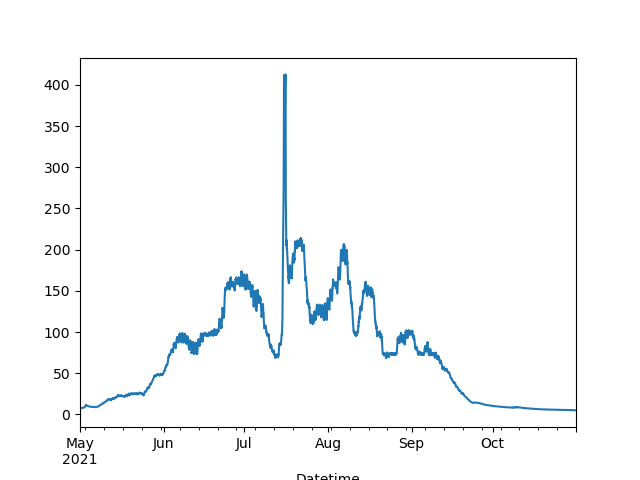

1188672046.56


In [5]:
## INTEGRATE Q OVER SELECTED TIME PERIOD

# Select data from specific range
## iNPUT: Choose start and end times ##
start = pd.to_datetime('5/1/2021 00:00')
end = pd.to_datetime('10/31/2021 23:00')

# create 'rng', a table of just the selected time period
rng=hourly[(start) : (end)]
    
# Plot data from that range
fig,ax=plt.subplots()
rng.Qm3s.plot();
plt.show()

# # calculate integral
# # first get length of interval in hours (not strictly necessary but here is how to do it)
# hours=np.datetime64(rng.index[-1],'h')-np.datetime64(rng.index[0],'h')

# sum hourly contributions. Qtotal is m3 discharge over the total interval
Qtotal=rng.Qm3H.sum()
print(Qtotal)

[1328462087.04, 1512917264.736, 1727659577.9520001, 1348366520.0880003, 1188672046.56]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
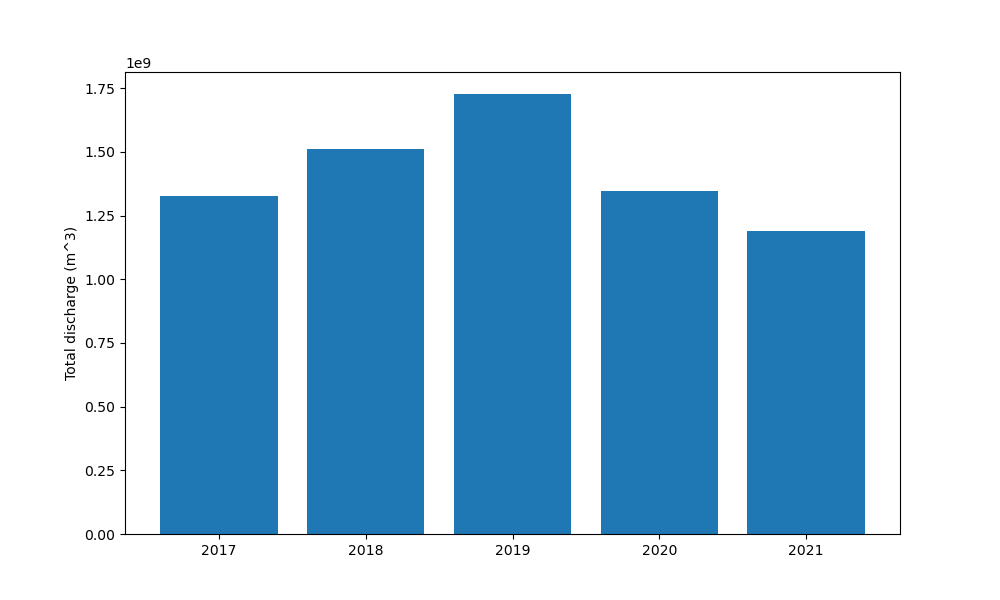

In [6]:
## INTEGRATE SUMMER VALUES FOR EACH YEAR OF RECORD

# integrate hourly values over selected period 2017-2021
years=np.arange(2017,2022)
# create empty array (list) to save Qtotals
Qtotal=[]

for t in years:
    # Select data from specific range
    rng=hourly[datetime.datetime(t,5,1,0,0,0):datetime.datetime(t,10,31,23,0,0)]

    # calculate integral
    # sum hourly contributions. Qtotal is m3 discharge over the total interval
    temp=rng.Qm3H.sum()
    # add Qtotal to growing list
    Qtotal += [temp]
    # Qtotal a vector of total Q (m3/s) for each summer, as defined by range above
    
print(Qtotal)
# plot comparative discharges
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Total discharge (m^3)')
ax.annotate
plt.bar(years.tolist(),Qtotal)
plt.show()
